In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyrecode.recode_reader import ReCoDeReader

In [2]:
intermediate_file_name = '/scratch/loh/abhik/24-Oct-2019/gold_nano_dose_0.022/gold_nano_on_cgrid.rc1_part000'

### When reading v0.1 files, 'is_intermediate' is a required parameter. Other than that the procedure is same as reading any other ReCoDe file.

We will retrieve the ReCoDe header as a dictionary and get the frame shape from there

In [13]:
reader = ReCoDeReader(intermediate_file_name, is_intermediate=True)
reader.open()
header = reader.get_header().as_dict()

summed_frame = np.zeros((header['nx'], header['ny']))
frame_data = reader.get_next_frame()
while frame_data:
    frame_id = list(frame_data.keys())[0]
    summed_frame = np.add(summed_frame, frame_data[frame_id]['data'].toarray())
    print('Read frame', frame_id, 'with', frame_data[frame_id]['data'].nnz, 'non-zero values')
    frame_data = reader.get_next_frame()
reader.close()

ReCoDe Header
-------------
uid = 255
version_major = 0
version_minor = 1
reduction_level = 1
rc_operation_mode = 1
target_bit_depth = 12
nx = 4096
ny = 4096
nz = 240
L2_statistics = 0
L4_centroiding = 0
compression_scheme = 0
compression_level = 1
source_file_type = 2
source_header_length = 0
source_header_position = 1
source_file_name = gold_nano_on_cgrid                                                                                  
calibration_file_name = 11-26-03.936_Dark_Ref_1_80fps_30s.seq                                                               
calibration_threshold_epsilon = 0
has_calibration_data = 1
frame_offset = 0
calibration_frame_offset = 0
num_calibration_frames = 240
source_bit_depth = 12
source_dtype = 0
target_dtype = 0
checksum = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
futures = [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  46   0 100   0 108   0
 108   0  

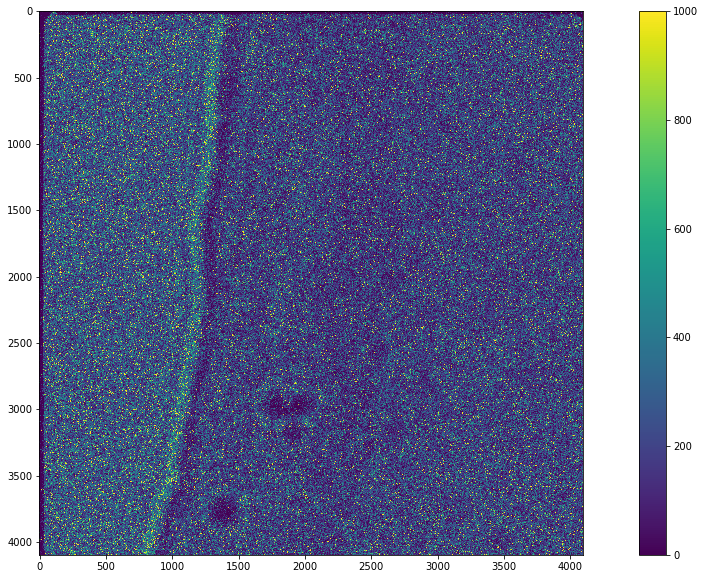

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
im = ax.imshow(summed_frame, vmax=1000)
fig.colorbar(im)
plt.show()

### Read and merge frames from multiple intermediate files
Here we read the first 20 frames from each of the 12 intermediate files and calculate the sum. This time we maintain the read frames in-memory but in sparse format, just to show a different approach. 

In [14]:
frames = {}
for i in range(12):
    _part_id = '_part' + '{0:03d}'.format(i)
    intermediate_file_name = '/scratch/loh/abhik/24-Oct-2019/gold_nano_dose_0.022/gold_nano_on_cgrid.rc1' + _part_id
    
    reader = ReCoDeReader(intermediate_file_name, is_intermediate=True)
    reader.open()

    frame_data = reader.get_next_frame()
    count = 1
    while frame_data and count < 20:
        frame_id = list(frame_data.keys())[0]
        frames[frame_id] = frame_data[frame_id]['data']
        print('Read frame', frame_id, 'with', frame_data[frame_id]['data'].nnz, 'non-zero values')
        frame_data = reader.get_next_frame()
        count += 1
    reader.close()

ReCoDe Header
-------------
uid = 255
version_major = 0
version_minor = 1
reduction_level = 1
rc_operation_mode = 1
target_bit_depth = 12
nx = 4096
ny = 4096
nz = 240
L2_statistics = 0
L4_centroiding = 0
compression_scheme = 0
compression_level = 1
source_file_type = 2
source_header_length = 0
source_header_position = 1
source_file_name = gold_nano_on_cgrid                                                                                  
calibration_file_name = 11-26-03.936_Dark_Ref_1_80fps_30s.seq                                                               
calibration_threshold_epsilon = 0
has_calibration_data = 1
frame_offset = 0
calibration_frame_offset = 0
num_calibration_frames = 240
source_bit_depth = 12
source_dtype = 0
target_dtype = 0
checksum = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
futures = [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0  46   0 100   0 108   0
 108   0  

Read frame 104 with 721611 non-zero values
Read frame 105 with 727430 non-zero values
Read frame 106 with 722018 non-zero values
Read frame 107 with 724015 non-zero values
Read frame 108 with 721873 non-zero values
Read frame 109 with 714893 non-zero values
Read frame 110 with 722687 non-zero values
Read frame 111 with 726525 non-zero values
Read frame 112 with 721311 non-zero values
Read frame 113 with 722769 non-zero values
Read frame 114 with 725776 non-zero values
Read frame 115 with 722963 non-zero values
Read frame 116 with 717317 non-zero values
Read frame 117 with 728847 non-zero values
Read frame 118 with 727443 non-zero values
Read frame 119 with 725495 non-zero values
Read frame 120 with 723307 non-zero values
Read frame 121 with 719804 non-zero values
Read frame 122 with 724011 non-zero values
ReCoDe Header
-------------
uid = 255
version_major = 0
version_minor = 1
reduction_level = 1
rc_operation_mode = 1
target_bit_depth = 12
nx = 4096
ny = 4096
nz = 240
L2_statistics = 

Read frame 235 with 725872 non-zero values
Read frame 236 with 725466 non-zero values
Read frame 237 with 725210 non-zero values
Read frame 238 with 723106 non-zero values
Read frame 239 with 728983 non-zero values
Read frame 240 with 726341 non-zero values
Read frame 241 with 723157 non-zero values
Read frame 242 with 730020 non-zero values
Read frame 243 with 728401 non-zero values
Read frame 244 with 728931 non-zero values
Read frame 245 with 725644 non-zero values
Read frame 246 with 721051 non-zero values
Read frame 247 with 724277 non-zero values
Read frame 248 with 726866 non-zero values
Read frame 249 with 727780 non-zero values
Read frame 250 with 728888 non-zero values
Read frame 251 with 721855 non-zero values
Read frame 252 with 721610 non-zero values
ReCoDe Header
-------------
uid = 255
version_major = 0
version_minor = 1
reduction_level = 1
rc_operation_mode = 1
target_bit_depth = 12
nx = 4096
ny = 4096
nz = 240
L2_statistics = 0
L4_centroiding = 0
compression_scheme = 0

In [16]:
summed_frame = np.zeros((header['nx'], header['ny']))
for frame_id in frames:
    summed_frame = np.add(summed_frame, frames[frame_id].toarray())

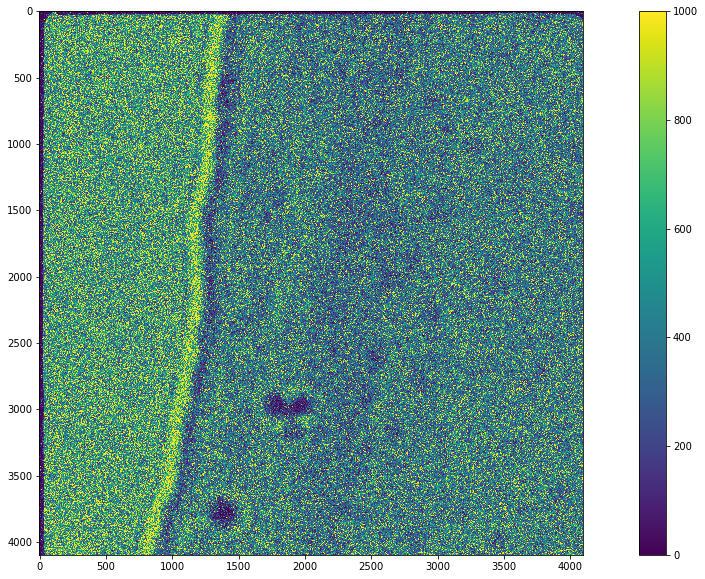

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
im = ax.imshow(summed_frame, vmax=1000)
fig.colorbar(im)
plt.show()